In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from datetime import timedelta, datetime

import warnings
warnings.filterwarnings('ignore')

import acquire

from acquire import super_store_frame

# plotting defaults
plt.rc('figure', figsize = (13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size = 16)

# Data Preparation Exercises

The end result of this exercise should be a file named `prepare.py`.

**Using your store items data:**

1. Convert date column to datetime format.

In [2]:
#get super df
sf = super_store_frame()

#check it
sf.head()

,item,sale_amount,sale_date,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [3]:
#get df info
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   item_brand     913000 non-null  object 
 6   item_id        913000 non-null  int64  
 7   item_name      913000 non-null  object 
 8   item_price     913000 non-null  float64
 9   item_upc12     913000 non-null  int64  
 10  item_upc14     913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_id       913000 non-null  int64  
 14  store_state    913000 non-null  object 
 15  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 118.4+ MB


In [4]:
#convert sale date to datetime
sf.sale_date = pd.to_datetime(sf.sale_date)

#set index to datetime array; make sure it is sorted
sf = sf.set_index('sale_date').sort_index()

#check it
sf.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01 00:00:00+00:00,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


In [5]:
#cache time series data to .csv
#sf.to_csv('super_stores_dt_index.csv')

In [6]:
#reset dataframe instead of kernel
#sf = pd.read_csv('super_stores_dt_index.csv', index_col = 0)
sf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_id        913000 non-null  int64  
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_id       913000 non-null  int64  
 13  store_state    913000 non-null  object 
 14  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(8), object(5)
memory usage: 111.5+ MB


2. Plot the distribution of sale_amount and item_price.

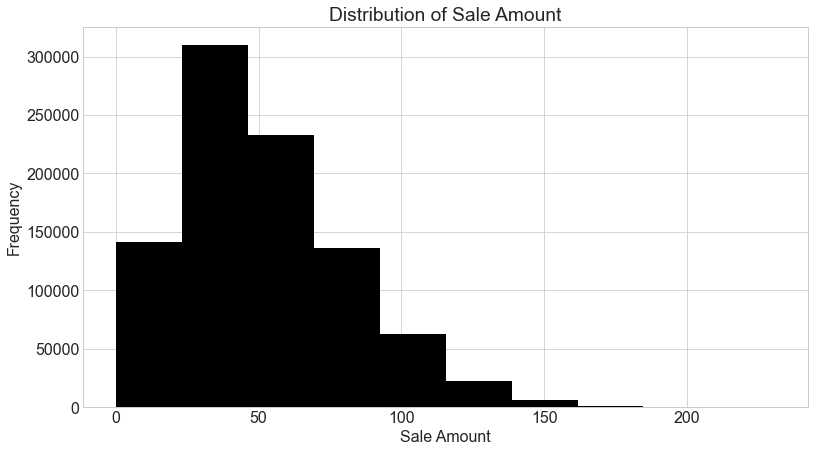

In [8]:
#plot histogram of sale_amount to get distribution
sf.sale_amount.hist(color = 'k')
plt.title('Distribution of Sale Amount')
plt.ylabel('Frequency')
plt.xlabel('Sale Amount');

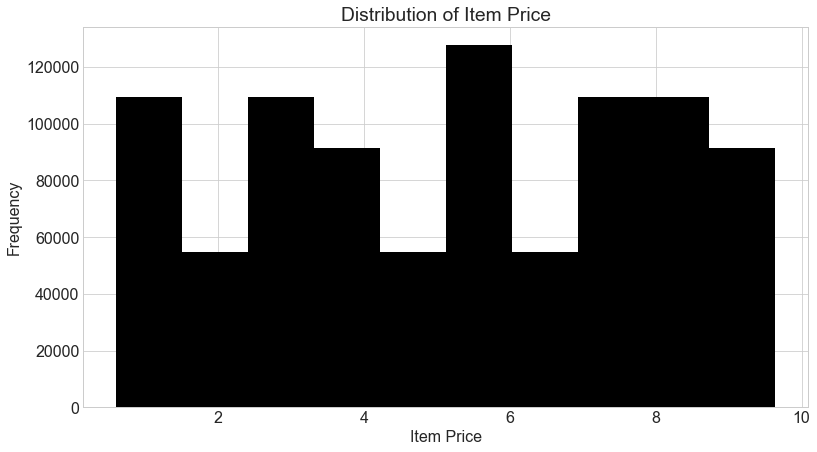

In [9]:
#plot histogram of item_price to get distribution
sf.item_price.hist(color = 'k')
plt.title('Distribution of Item Price')
plt.ylabel('Frequency')
plt.xlabel('Item Price');

3. Set the index to be the datetime variable.

Done. See Exercise I

4. Add a 'month' and 'day of week' column to your dataframe.

In [26]:
#check index
print(type(sf.index))
sf.index.dtype

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


datetime64[ns, UTC]

In [20]:
#assign month column to the respective datetime index month
sf['month'] = sf.index.month

In [21]:
#check it
sf.month.value_counts()

1     77500
3     77500
5     77500
7     77500
8     77500
10    77500
12    77500
4     75000
6     75000
9     75000
11    75000
2     70500
Name: month, dtype: int64

In [22]:
#assign day of week column to datetime index weekday
sf['day_of_week'] = sf.index.weekday

In [23]:
#check it out
sf.day_of_week.value_counts()

1    130500
2    130500
3    130500
4    130500
5    130500
6    130500
0    130000
Name: day_of_week, dtype: int64

In [24]:
#assign new weekday column but with strings that display the day
sf['stringday'] = sf.day_of_week.map({0: 'Monday',
                                      1: 'Tuesday',
                                      2: 'Wednesday',
                                      3: 'Thursday',
                                      4: 'Friday',
                                      5: 'Saturday',
                                      6: 'Sunday'
                                     })

In [25]:
#check it
sf.stringday.value_counts()

Sunday       130500
Tuesday      130500
Friday       130500
Thursday     130500
Wednesday    130500
Saturday     130500
Monday       130000
Name: stringday, dtype: int64

5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [27]:
#assign sales total column to product of total items and item price
sf['sales_total'] = sf.sale_amount * sf.item_price

#checkit
sf.sales_total.value_counts()

41.76      1534
16.80      1489
12.60      1346
52.20      1208
80.19      1145
           ... 
875.84        1
838.49        1
824.32        1
1293.60       1
62.28         1
Name: sales_total, Length: 5332, dtype: int64

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [28]:
#last looks
sf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_id        913000 non-null  int64  
 3   store          913000 non-null  int64  
 4   item_brand     913000 non-null  object 
 5   item_id        913000 non-null  int64  
 6   item_name      913000 non-null  object 
 7   item_price     913000 non-null  float64
 8   item_upc12     913000 non-null  int64  
 9   item_upc14     913000 non-null  int64  
 10  store_address  913000 non-null  object 
 11  store_city     913000 non-null  object 
 12  store_id       913000 non-null  int64  
 13  store_state    913000 non-null  object 
 14  store_zipcode  913000 non-null  int64  
 15  month          913000 non-null  int64  
 16  day_of_week    913000 non-nu

In [30]:
#make a list of redundant columns
redundant = ['item', 'store']

#drop the redundants
sf = sf.drop(columns = redundant)

In [34]:
sf.head()

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,day_of_week,stringday,sales_total
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,30.16
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,1,Tuesday,308.48
2013-01-01 00:00:00+00:00,45.0,314073,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,197.55
2013-01-01 00:00:00+00:00,34.0,332333,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,1,Tuesday,25.16


In [35]:
def prep_tssf():
    
    #get super df
    sf = super_store_frame()
    
    #convert sale date to datetime
    sf.sale_date = pd.to_datetime(sf.sale_date)
    
    #set index to datetime array; make sure it is sorted
    sf = sf.set_index('sale_date').sort_index()
    
    #assign month column to the respective datetime index month
    sf['month'] = sf.index.month
    
    #assign day of week column to datetime index weekday
    sf['day_of_week'] = sf.index.weekday
    
    #assign new weekday column but with strings that add clarity
    sf['stringday'] = sf.day_of_week.map({0: 'Monday',
                                          1: 'Tuesday',
                                          2: 'Wednesday',
                                          3: 'Thursday',
                                          4: 'Friday',
                                          5: 'Saturday',
                                          6: 'Sunday'
                                         })
    
    #assign sales total column to product of total items and item price
    sf['sales_total'] = sf.sale_amount * sf.item_price
    
    #make a list of redundant columns
    redundant = ['item', 'store']

    #drop the redundants
    sf = sf.drop(columns = redundant)
    
    #return prepped frame
    return sf

In [57]:
def plot_sales_distributions(sf):
    
    plt.figure(figsize = (13, 7))
    
    #plot histogram of sale_amount to get distribution
    sf.sale_amount.hist(color = 'k')
    plt.title('Distribution of Sale Amount')
    plt.ylabel('Frequency')
    plt.xlabel('Sale Amount')
    plt.tight_layout();

    plt.figure(figsize = (13, 7))
    
    #plot histogram of item_price to get distribution
    sf.item_price.hist(color = 'k')
    plt.title('Distribution of Item Price')
    plt.ylabel('Frequency')
    plt.xlabel('Item Price')
    
    plt.tight_layout();

In [51]:
#testing
sf = prep_tssf()

KeyboardInterrupt: 

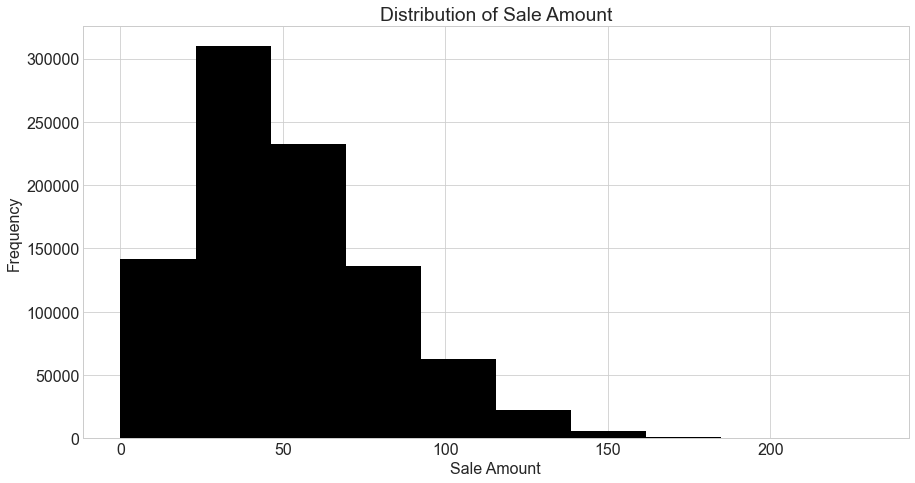

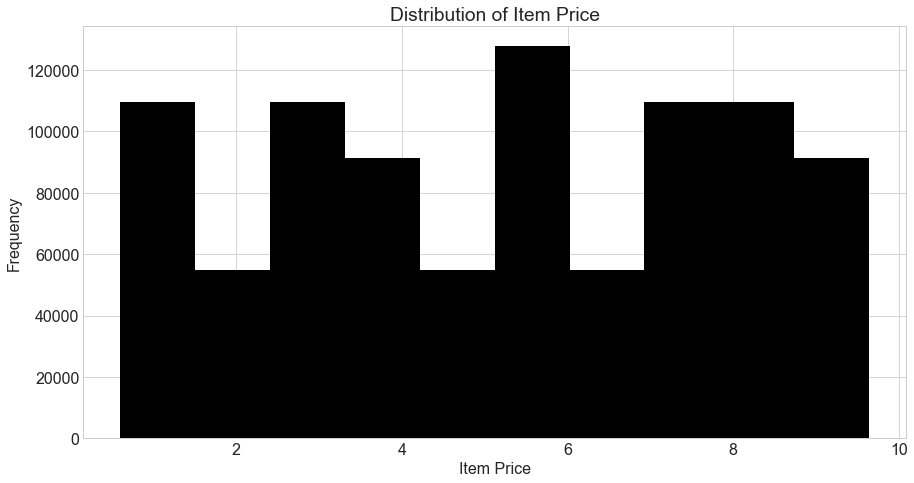

In [58]:
#testing, attention, please
plot_sales_distributions(sf)

**Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:**

1. Convert date column to datetime format.

In [2]:
import acquire
power = acquire.get_power()

In [3]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [61]:
power.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [7]:
#convert date column to datetime array
power.Date = pd.to_datetime(power.Date)

#set the index to the datetime array, then sort the index
power = power.set_index('Date').sort_index()

#check it
power

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [8]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


2. Plot the distribution of each of your variables.

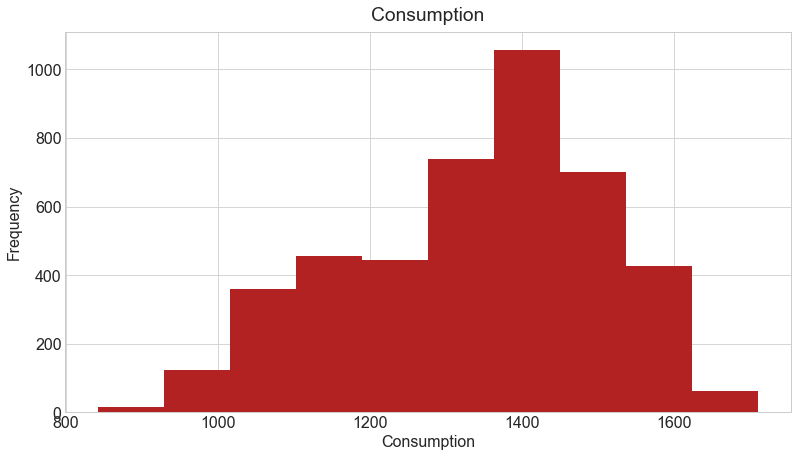

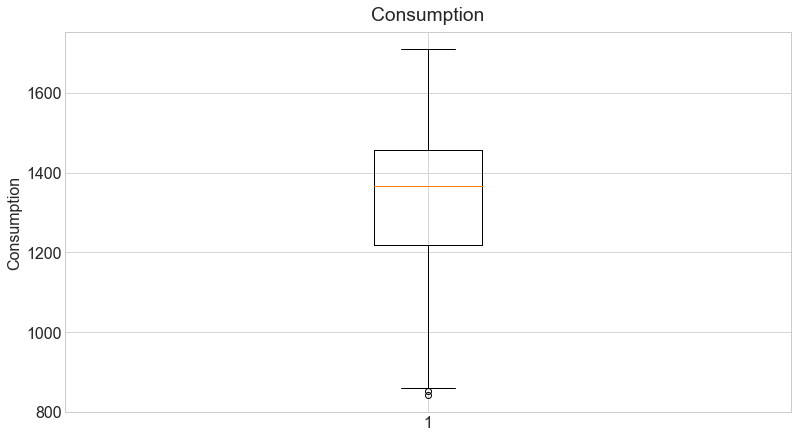

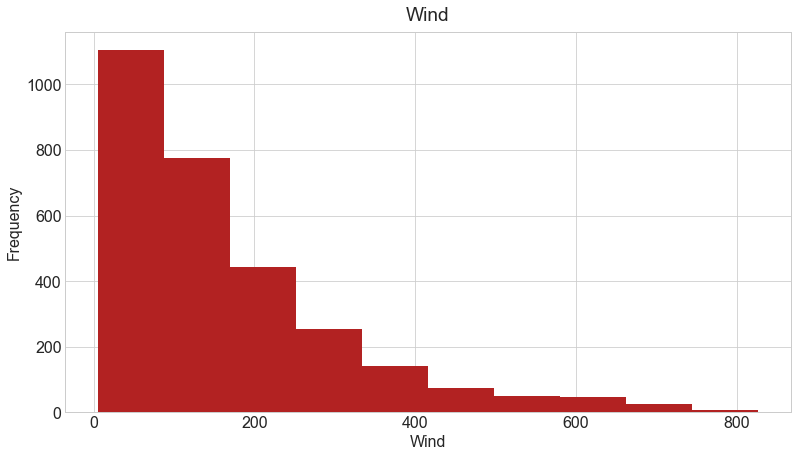

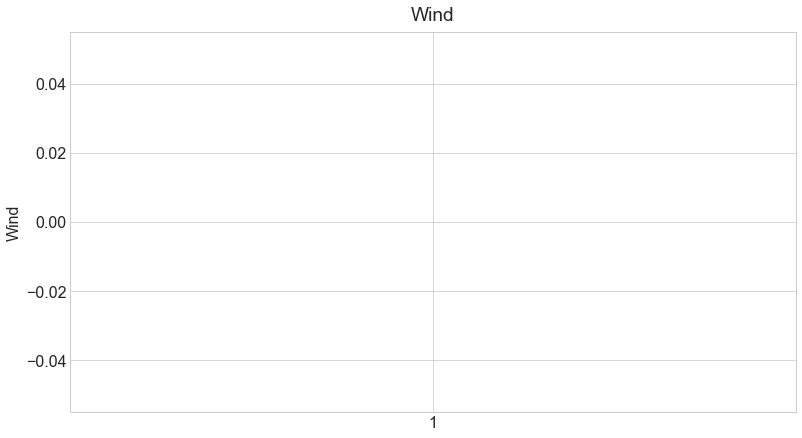

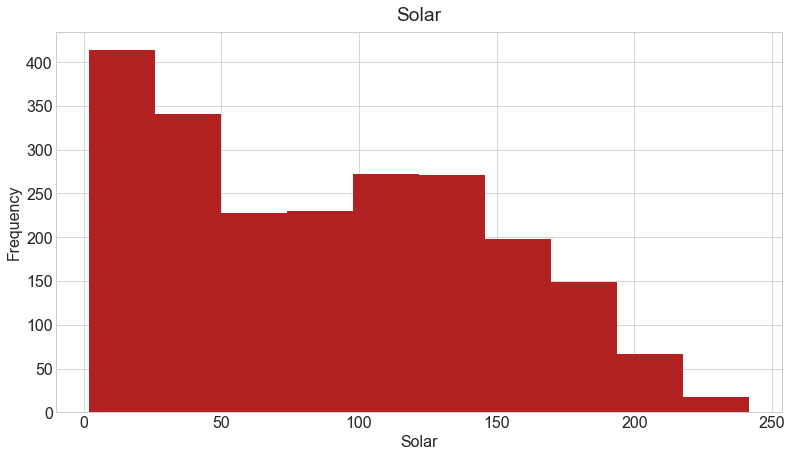

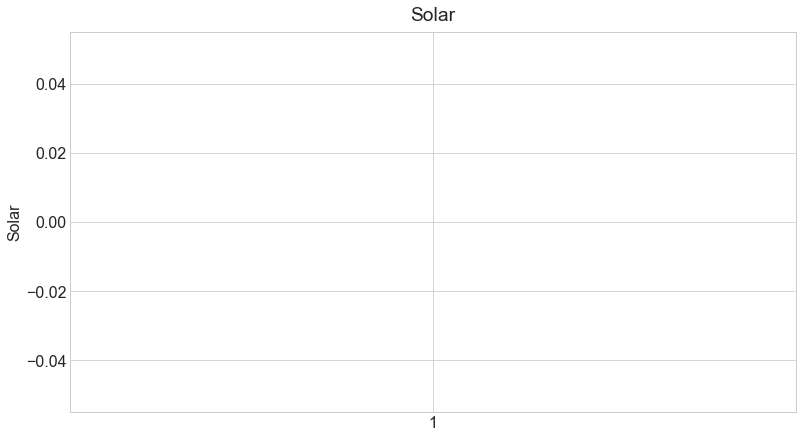

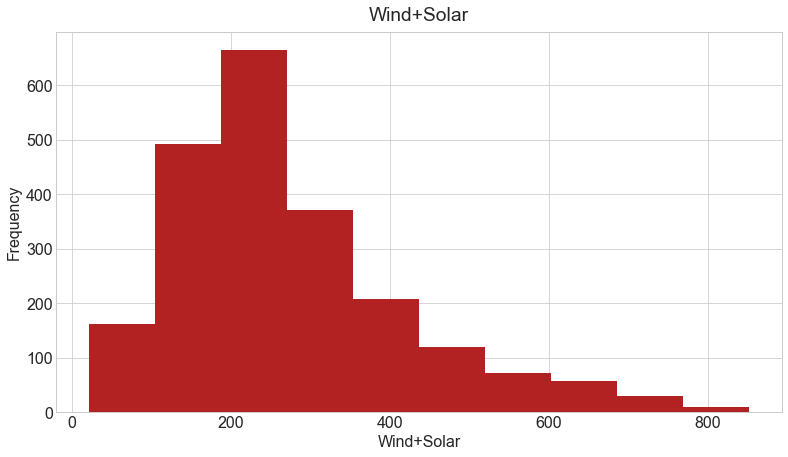

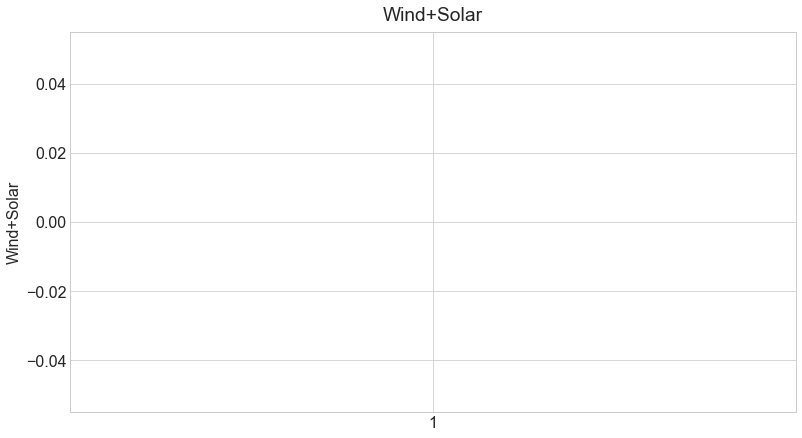

<Figure size 936x504 with 0 Axes>

In [10]:
for cat in power.columns:
    power[cat].hist(color = 'firebrick')
    plt.title(cat, pad = 11)
    plt.xlabel(cat)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show();
    plt.boxplot(power[cat])
    plt.title(cat, pad = 11)
    plt.ylabel(cat)
    plt.grid(True)
    plt.show()
    plt.tight_layout();

3. Set the index to be the datetime variable.

Done.

4. Add a month and a year column to your dataframe.

In [12]:
power['month'] = power.index.month
power['year'] = power.index.year

In [13]:
power.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


In [14]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


5. Fill any missing values.

In [19]:
power.Consumption.isnull()

Date
2006-01-01    False
2006-01-02    False
2006-01-03    False
2006-01-04    False
2006-01-05    False
              ...  
2017-12-27    False
2017-12-28    False
2017-12-29    False
2017-12-30    False
2017-12-31    False
Name: Consumption, Length: 4383, dtype: bool

In [25]:
power = power.fillna(0)

In [26]:
power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         4383 non-null   float64
 2   Solar        4383 non-null   float64
 3   Wind+Solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [23]:
power.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,2006
2006-01-02,1380.521,0.0,0.0,0.0,1,2006
2006-01-03,1442.533,0.0,0.0,0.0,1,2006
2006-01-04,1457.217,0.0,0.0,0.0,1,2006
2006-01-05,1477.131,0.0,0.0,0.0,1,2006


6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [27]:
power.columns = power.columns.str.lower().str.replace('+', '_')

power.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   consumption  4383 non-null   float64
 1   wind         4383 non-null   float64
 2   solar        4383 non-null   float64
 3   wind_solar   4383 non-null   float64
 4   month        4383 non-null   int64  
 5   year         4383 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 239.7 KB


In [28]:
def prep_power():
    
    #get power
    power = acquire.get_power()
    
    #convert date column to datetime array
    power.Date = pd.to_datetime(power.Date)
    
    #set the index to the datetime array, then sort the index
    power = power.set_index('Date').sort_index()
    
    #add month and year columns
    power['month'] = power.index.month
    power['year'] = power.index.year
    
    #fill missing values with 0
    power = power.fillna(0)
    
    #fix columns to match personal preference
    power.columns = power.columns.str.lower().str.replace('+', '_')
    
    return power